In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

# Load the Excel file
xlsx_file = 'Dry_Bean_Dataset.xlsx'  # Replace with your .xlsx file path
df = pd.read_excel(xlsx_file)

# Save it as a CSV file
csv_file = 'Dry_Bean_Dataset.csv'  # Replace with your desired .csv file path
df.to_csv(csv_file, index=False)  # Set index=False to exclude the index column

In [3]:
import numpy as np, pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

import seaborn as sns

from sklearn.model_selection import train_test_split
from collections import Counter


Counter({6: 2636, 0: 2027, 5: 1928, 3: 1630, 1: 1322, 2: 522})
Epoch 1/1000 completed.
<End Checkpoint>
Epoch 2/1000 completed.
<End Checkpoint>
Epoch 3/1000 completed.
<End Checkpoint>
Epoch 4/1000 completed.
<End Checkpoint>
Epoch 5/1000 completed.
<End Checkpoint>
Epoch 6/1000 completed.
<End Checkpoint>
Epoch 7/1000 completed.
<End Checkpoint>
Epoch 8/1000 completed.
<End Checkpoint>
Epoch 9/1000 completed.
<End Checkpoint>
Epoch 10/1000 completed.
<End Checkpoint>
Epoch 11/1000 completed.
<End Checkpoint>
Epoch 12/1000 completed.
<End Checkpoint>
Epoch 13/1000 completed.
<End Checkpoint>
Epoch 14/1000 completed.
<End Checkpoint>
Epoch 15/1000 completed.
<End Checkpoint>
Epoch 16/1000 completed.
<End Checkpoint>
Epoch 17/1000 completed.
<End Checkpoint>
Epoch 18/1000 completed.
<End Checkpoint>
Epoch 19/1000 completed.
<End Checkpoint>
Epoch 20/1000 completed.
<End Checkpoint>
Epoch 21/1000 completed.
<End Checkpoint>
Epoch 22/1000 completed.
<End Checkpoint>
Epoch 23/1000 complete

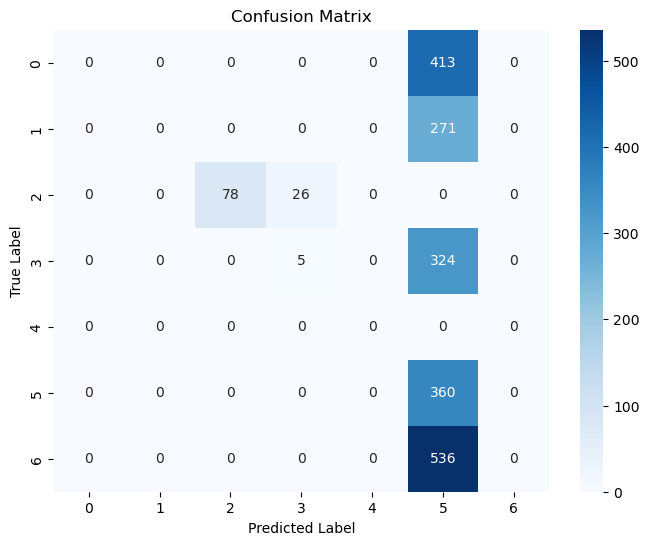

In [5]:



# Read CSV file converted from Excel
data = pd.read_csv('Dry_Bean_Dataset.csv')
df = pd.DataFrame(data)

# Map class names to integer labels
label = []
for i in df['Class']:
    if i == 'SEKER':
        label.append(0)
    elif i == 'BARBUNYA':
        label.append(1)
    elif i == 'BOMBAY':
        label.append(2)
    elif i == 'CALI':
        label.append(3)
    elif i == 'DERMOSAN':
        label.append(4)
    elif i == 'HOROZ':
        label.append(5)
    elif i == 'SIRA':
        label.append(6)
print(Counter(label))  # Count the occurrences of each class
# Extract features
x1 = df['MajorAxisLength']
x2 = df['MinorAxisLength']
x3 = df['Perimeter']
x4 = df['Area']
x5 = df['AspectRation']
x6 = df['Compactness']
x7 = df['Eccentricity']
x8 = df['Extent']
x9 = df['Solidity']
x10 = df['ConvexArea']
x11 = df['EquivDiameter']
x12 = df['roundness']
x13 = df['ShapeFactor1']
x14 = df['ShapeFactor2']
x15 = df['ShapeFactor3']
x16 = df['ShapeFactor4']

# Combine features and labels into a list of tuples
train_data = list(zip(x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, label))


class Logistic_Regression:
    def __init__(self, traindata, alpha=0.001, circle=1000, batchlength=40, n_classes=7):
        self.traindata = traindata  # Training dataset
        self.alpha = alpha          # Learning rate
        self.circle = circle        # Number of epochs
        self.batchlength = batchlength  # Batch size
        self.n_classes = n_classes      # Number of classes
        # Initialize weights with shape (features+1, n_classes), +1 for bias term.
        self.w = np.random.normal(size=(16 + 1, n_classes))
    
    def data_process(self):
        '''Shuffle data and split into batches'''
        np.random.shuffle(self.traindata)  # randomize the order of training data
        data = [self.traindata[i:i + self.batchlength]
                for i in range(0, len(self.traindata), self.batchlength)]
        return data

    def softmax(self, x):
        '''Compute softmax probabilities'''
        exp_x = np.exp(x - np.max(x))  # subtract max for numerical stability
        return exp_x / np.sum(exp_x, axis=0)
    
    def save_checkpoint(self, filename='checkpoint.npz'):
        '''Save current weights to a checkpoint file'''
        np.savez(filename, w=self.w)
        print("<End Checkpoint>")  # Marker indicating checkpoint saved

    def load_checkpoint(self, filename='checkpoint.npz'):
        '''Load weights from a checkpoint file'''
        data = np.load(filename)
        self.w = data['w']
        print("Checkpoint loaded from", filename)
    
    def train(self):
        '''Train using cross-entropy loss and gradient descent'''
        for epoch in range(self.circle):
            batches = self.data_process()
            epoch_loss = 0
            for batch in batches:
                d_w = np.zeros_like(self.w)  # shape: (17, 7)
                for j in batch:
                    x0 = np.r_[j[0:16], 1]           # features + bias term -> shape (17,)
                    x = np.mat(x0).T                # column vector shape (17, 1)
                    y = np.zeros((self.n_classes, 1)) # one-hot vector shape (7, 1)
                    y[j[16]] = 1
                    z = self.w.T @ x              # linear combination: shape (7, 1)
                    probs = self.softmax(z)       # softmax probabilities: shape (7, 1)
                    # Compute gradient: outer product, x (17,1) @ (probs-y).T (1,7) -> (17,7)
                    d_w += x @ (probs - y).T
                    # For monitoring, you might compute individual loss here if needed.
                # Update weights based on average gradient of batch
                self.w -= self.alpha * d_w / self.batchlength
            # Optionally, save a checkpoint after each epoch to allow faster recovery.
            print(f"Epoch {epoch+1}/{self.circle} completed.")
            self.save_checkpoint()  # Save checkpoint at end of epoch

    def predict(self, x):
        '''Predict the class of a new data point'''
        x0 = np.r_[x, 1]  # append bias term
        x_vec = np.mat(x0).T  # column vector
        z = self.w.T @ x_vec  # linear combination
        probs = self.softmax(z)  # compute class probabilities
        return np.argmax(probs)
    

def calculate_accuracy(model, test_data):
    """
    Calculate accuracy on test dataset.
    Returns:
        accuracy: Accuracy percentage.
        predictions: List of predicted class labels.
        true_labels: List of true class labels.
    """
    correct_predictions = 0
    predictions = []
    true_labels = []
    for data_point in test_data:
        x = np.array(data_point[0:16])  # features
        true_label = data_point[16]
        predicted_label = model.predict(x)
        predictions.append(predicted_label)
        true_labels.append(true_label)
        if predicted_label == true_label:
            correct_predictions += 1
    accuracy = (correct_predictions / len(test_data)) * 100
    return accuracy, predictions, true_labels


def plot_confusion_matrix(true_labels, predictions, n_classes):
    """
    Compute and plot confusion matrix given true labels and predictions.
    """
    cm = confusion_matrix(true_labels, predictions, labels=list(range(n_classes)))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[str(i) for i in range(n_classes)],
                yticklabels=[str(i) for i in range(n_classes)])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


if __name__ == '__main__':
    # Randomly split data into training (80%) and testing (20%) sets
    from sklearn.model_selection import train_test_split
    train_data_subset, test_data = train_test_split(train_data, test_size=0.2, random_state=42, shuffle=True)
    
    # Initialize and train the multi-class logistic regression model
    regr = Logistic_Regression(traindata=train_data_subset, n_classes=7)
    regr.train()
    
    # Evaluate accuracy on the test set
    accuracy, predictions, true_labels = calculate_accuracy(regr, test_data)
    print(f"Accuracy on the test set: {accuracy:.2f}%")
    
    # Plot the confusion matrix for a deeper analysis of misclassifications
    plot_confusion_matrix(true_labels, predictions, n_classes=7)

In [ ]:

data=pd.read_csv('Dry_Bean_Dataset.csv')
df=pd.DataFrame(data)
label=[]
for i in df['Class'][0:3349]:
    if i=='SEKER':
        label.append(0)
    elif i=='BARBUNYA':
        label.append(1)
    elif i=='BOMBAY':
        label.append(2)
    elif i=='CALI':
        label.append(3)
    elif i=='DERMOSAN':
        label.append(4) 
    elif i=='HOROZ':
        label.append(5)
    elif i=='SIRA':
        label.append(6)
x1=df['MajorAxisLength'][0:3349]
x2=df['MinorAxisLength'][0:3349]
x3=df['Perimeter'][0:3349]
x4=df['Area'][0:3349]
x5=df['AspectRation'][0:3349]
x6=df['Compactness'][0:3349]
x7=df['Eccentricity'][0:3349]
x8=df['Extent'][0:3349]
x9=df['Solidity'][0:3349]
x10=df['ConvexArea'][0:3349]
x11=df['EquivDiameter'][0:3349]
x12=df['roundness'][0:3349]
x13=df['ShapeFactor1'][0:3349]
x14=df['ShapeFactor2'][0:3349]
x15=df['ShapeFactor3'][0:3349]
x16=df['ShapeFactor4'][0:3349]

train_data=list(zip(x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,label))
class Logistic_Regression:
    def __init__(self, traindata, alpha=0.001, circle=1000, batchlength=40, n_classes=7):
        self.traindata = traindata  # Training dataset
        self.alpha = alpha  # Learning rate
        self.circle = circle  # Number of iterations
        self.batchlength = batchlength  # Batch size
        self.n_classes = n_classes  # Number of classes
        self.w = np.random.normal(size=(16 + 1, n_classes))  # Initialize weights (16 features + 1 bias)

    def data_process(self):
        '''Shuffle data and split into batches'''
        np.random.shuffle(self.traindata) # randomize the order of the training data for better performance
        data = [self.traindata[i:i + self.batchlength]
                for i in range(0, len(self.traindata), self.batchlength)] # split the data into batches of size batchlength and use gradient descent on each batch which improves efficiency
        return data

    def softmax(self, x):
        '''Compute softmax probabilities'''
        exp_x = np.exp(x - np.max(x))  # x is a vector corresponds to the term θc⊤x+θ0, Subtract max both for the numerator and denominator can decrease the computation without affecting the result
        return exp_x / np.sum(exp_x, axis=0)

    def train(self):
        '''Train using cross-entropy loss and gradient descent'''
        for i in range(self.circle):
            batches = self.data_process()
            print('Epoch {}'.format(i))  # Display epoch number
            for batch in batches:
                d_w = np.zeros_like(self.w)  # Gradient accumulator (shape: (17, 7))
                for j in batch:  # Process each data point in the batch
                    x0 = np.r_[j[0:16], 1]  # Features + bias term
                    x = np.mat(x0).T  # Convert to column vector (shape: (17, 1))
                    y = np.zeros((self.n_classes, 1))  # One-hot encode the label (shape: (7, 1))
                    y[j[16]] = 1 # One-hot encoding, set the corresponding element of class to 1
                    z = self.w.T @ x  # Linear combination (shape: (7, 1)), use the previous knowledge times the current input
                    probs = self.softmax(z)  # Softmax probabilities (shape: (7, 1)), that's the real probability of the class
                    d_w += x @ (probs - y).T  # cost function over all training training examples in the batch and the all classes. Outer product (shape: (17, 1) @ (1, 7) -> (17, 7))
                self.w -= self.alpha * d_w / self.batchlength  # Update weights based on the avarage gradient of the batch
    def predict(self, x):
        '''Predict the class of a new data point'''
        x0 = np.r_[x, 1]  # Add bias term
        x = np.mat(x0).T  # Convert to column vector
        z = self.w.T @ x  # Linear combination
        probs = self.softmax(z)  # Softmax probabilities
        return np.argmax(probs)  # Return the class with the highest probability

def calculate_accuracy(model, test_data):
        """
        Calculate the accuracy of the logistic regression model on the test dataset.
        
        Parameters:
            model: The trained Logistic_Regression model.
            test_data: A list of tuples, where each tuple contains features and the true label.
        
        Returns:
            accuracy: The accuracy of the model as a percentage.
        """
        correct_predictions = 0
        total_predictions = len(test_data)
        
        for data_point in test_data:
            x = np.array(data_point[0:16])  # Extract features
            true_label = data_point[16]  # Extract true label
            predicted_label = model.predict(x)  # Predict the label using the model
            
            if predicted_label == true_label:
                correct_predictions += 1
        
        accuracy = (correct_predictions / total_predictions) * 100
        return accuracy

def plot_confusion_matrix(true_labels, predictions, n_classes):
    """
    Compute and plot the confusion matrix.
    
    Parameters:
        true_labels: List of true class labels.
        predictions: List of predicted class labels.
        n_classes: Number of classes.
    """
    # Compute the confusion matrix
    cm = confusion_matrix(true_labels, predictions, labels=list(range(n_classes)))
    
    # Plot the confusion matrix using a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=[str(i) for i in range(n_classes)], 
                yticklabels=[str(i) for i in range(n_classes)])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

if __name__ == '__main__':
    # Split the data into training and testing sets
    train_size = int(0.8 * len(train_data))  # 80% for training
    train_data_subset = train_data[:train_size]
    test_data = train_data[train_size:]  # Remaining 20% for testing

    # Train the model
    regr = Logistic_Regression(traindata=train_data_subset, n_classes=7)
    regr.train()

    # Calculate accuracy and collect predictions and true labels for confusion matrix
    correct_predictions = 0
    total_predictions = len(test_data)
    predictions = []
    true_labels = []
    for data_point in test_data:
        x = np.array(data_point[0:16])  # Extract features
        true_label = data_point[16]       # Extract true label
        predicted_label = regr.predict(x) # Predict label
        predictions.append(predicted_label)
        true_labels.append(true_label)
        if predicted_label == true_label:
            correct_predictions += 1

    accuracy = (correct_predictions / total_predictions) * 100
    print(f"Accuracy on the test set: {accuracy:.2f}%")

    # Plot confusion matrix
    plot_confusion_matrix(true_labels, predictions, n_classes=7)


Epoch 0


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices